At this point there are multiple agents. But they act indepdently. There is no distribution/exchange mechanism for the agents.

Also, the product sector chosen by the agents is randomly selected after they choose to make the production decision. So division of labor will not be correct.

Include each product sector as a unique action. Should also include sector productivity input for agent's Deep Q Network

When agents can possess multiple instruments, will need to generalize or revisit the above.

In [1]:
import Agents
import Instruments
import Simulate
import Environment
import SimPlotting

import numpy as np
from scipy.stats import norm, uniform
import random

import matplotlib.pyplot as plt

In [2]:
def initialize_agents(initial_parameters, learning_paramters) -> list:

    kwargs = {**initial_parameters, **learning_parameters}
    
    
    Agent_list = [Agents.Agent(**kwargs) for i in range(Nagents)]

    return Agent_list

def initialize_instruments(Ninstruments, means, stds):
    '''
    Assumes Normal. Initializes Universal Instruments.
    
    Make more general to incude different distributions'''

    instruments = []

    means = mean_productivities
    stds = std_productivities

    for N in range(Ninstruments):
        prod_vec = [norm.rvs(loc=mean, scale=std) for mean, std in zip(means, stds)]
        instrument = Instruments.Universal(prod_vec)
        instruments.append(instrument)
        
    return instruments

def initialize_allocation(agent_list, instrument_list):
    
    for agent in agent_list:
        
        random_instrument = random.choice(instrument_list)
        instrument_list.remove(random_instrument)
        
        agent.Ins = random_instrument

Initialize Parameters

In [3]:
dt = 1

cg = np.array([1.0, 1.0])

Nproducts = cg.shape[0]

Nagents = 5

Nactions = 4

mean_productivities = [5, 2]
std_productivities = [0, 0]

Ninstruments = Nagents



In [4]:
initial_parameters = {
    'Q': np.zeros(Nproducts),
    'D': np.zeros(Nproducts),
    'cg': cg,
     'M': 10.,
}

learning_parameters = {
    'gamma': 0.9,
    #'gamma': 0.5,
    #'gamma': 0.1,
    'epsilon': 1.0,
    'eps_end': 0.001,
    'eps_dec': 0.01,
    'batch_size': 100,
    'input_dims': [2*Nproducts+1],
    'lr':0.001,
    #'lr': 0.01,
    'n_actions': Nactions,
}



Initialize Agents, Instruments, and Markets

In [5]:
agent_list = initialize_agents(initial_parameters, learning_parameters)
instrument_list = initialize_instruments(Ninstruments, mean_productivities, std_productivities)
market_list = [0]

initialize_allocation(agent_list, instrument_list)

env = Environment.Environment(dt, agent_list, instrument_list, market_list)
sim = Simulate.Simulate(env)


Run Simulation

In [6]:
Ntimes = 1000

sim.run_simulation(Ntimes)

Plot

In [7]:
splt = SimPlotting.SimPlotting(sim)
plt.rcParams['figure.dpi'] = 200

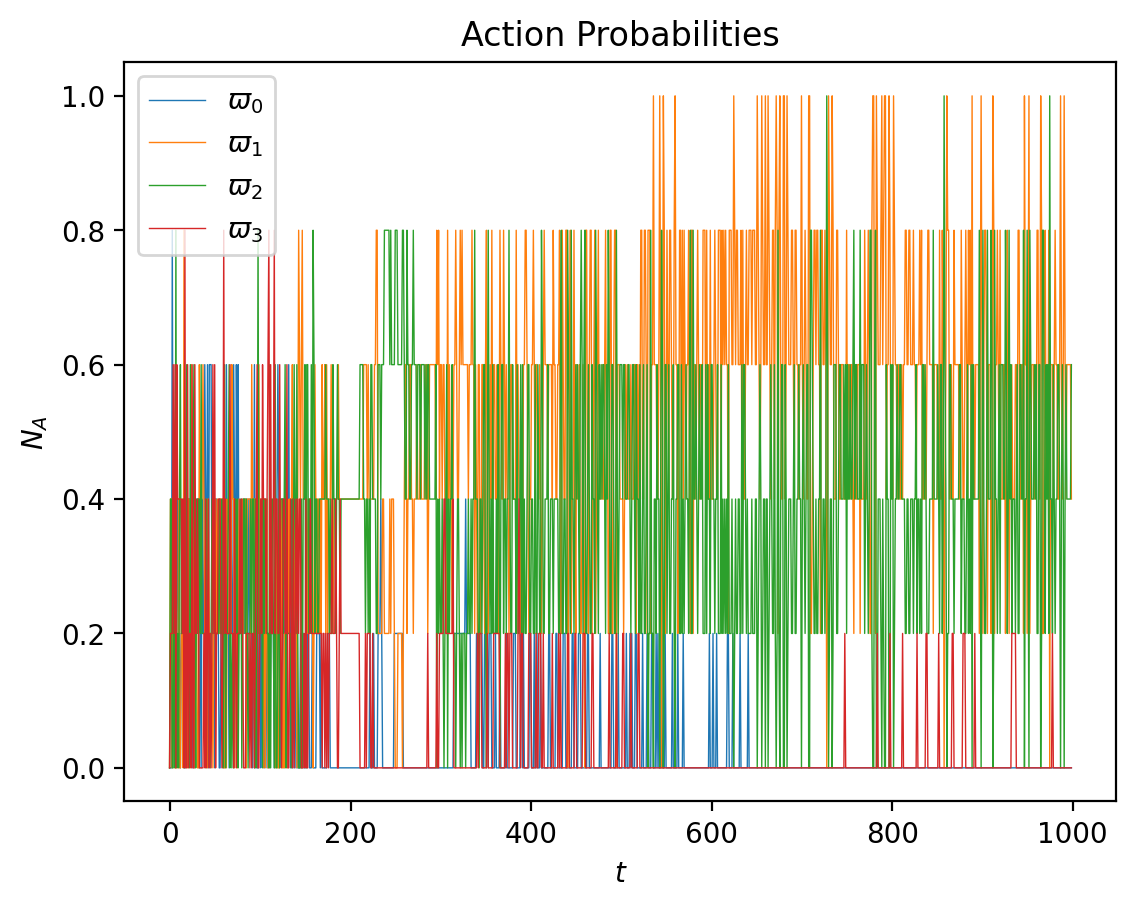

In [8]:
splt.plotA(lw1=0.5)

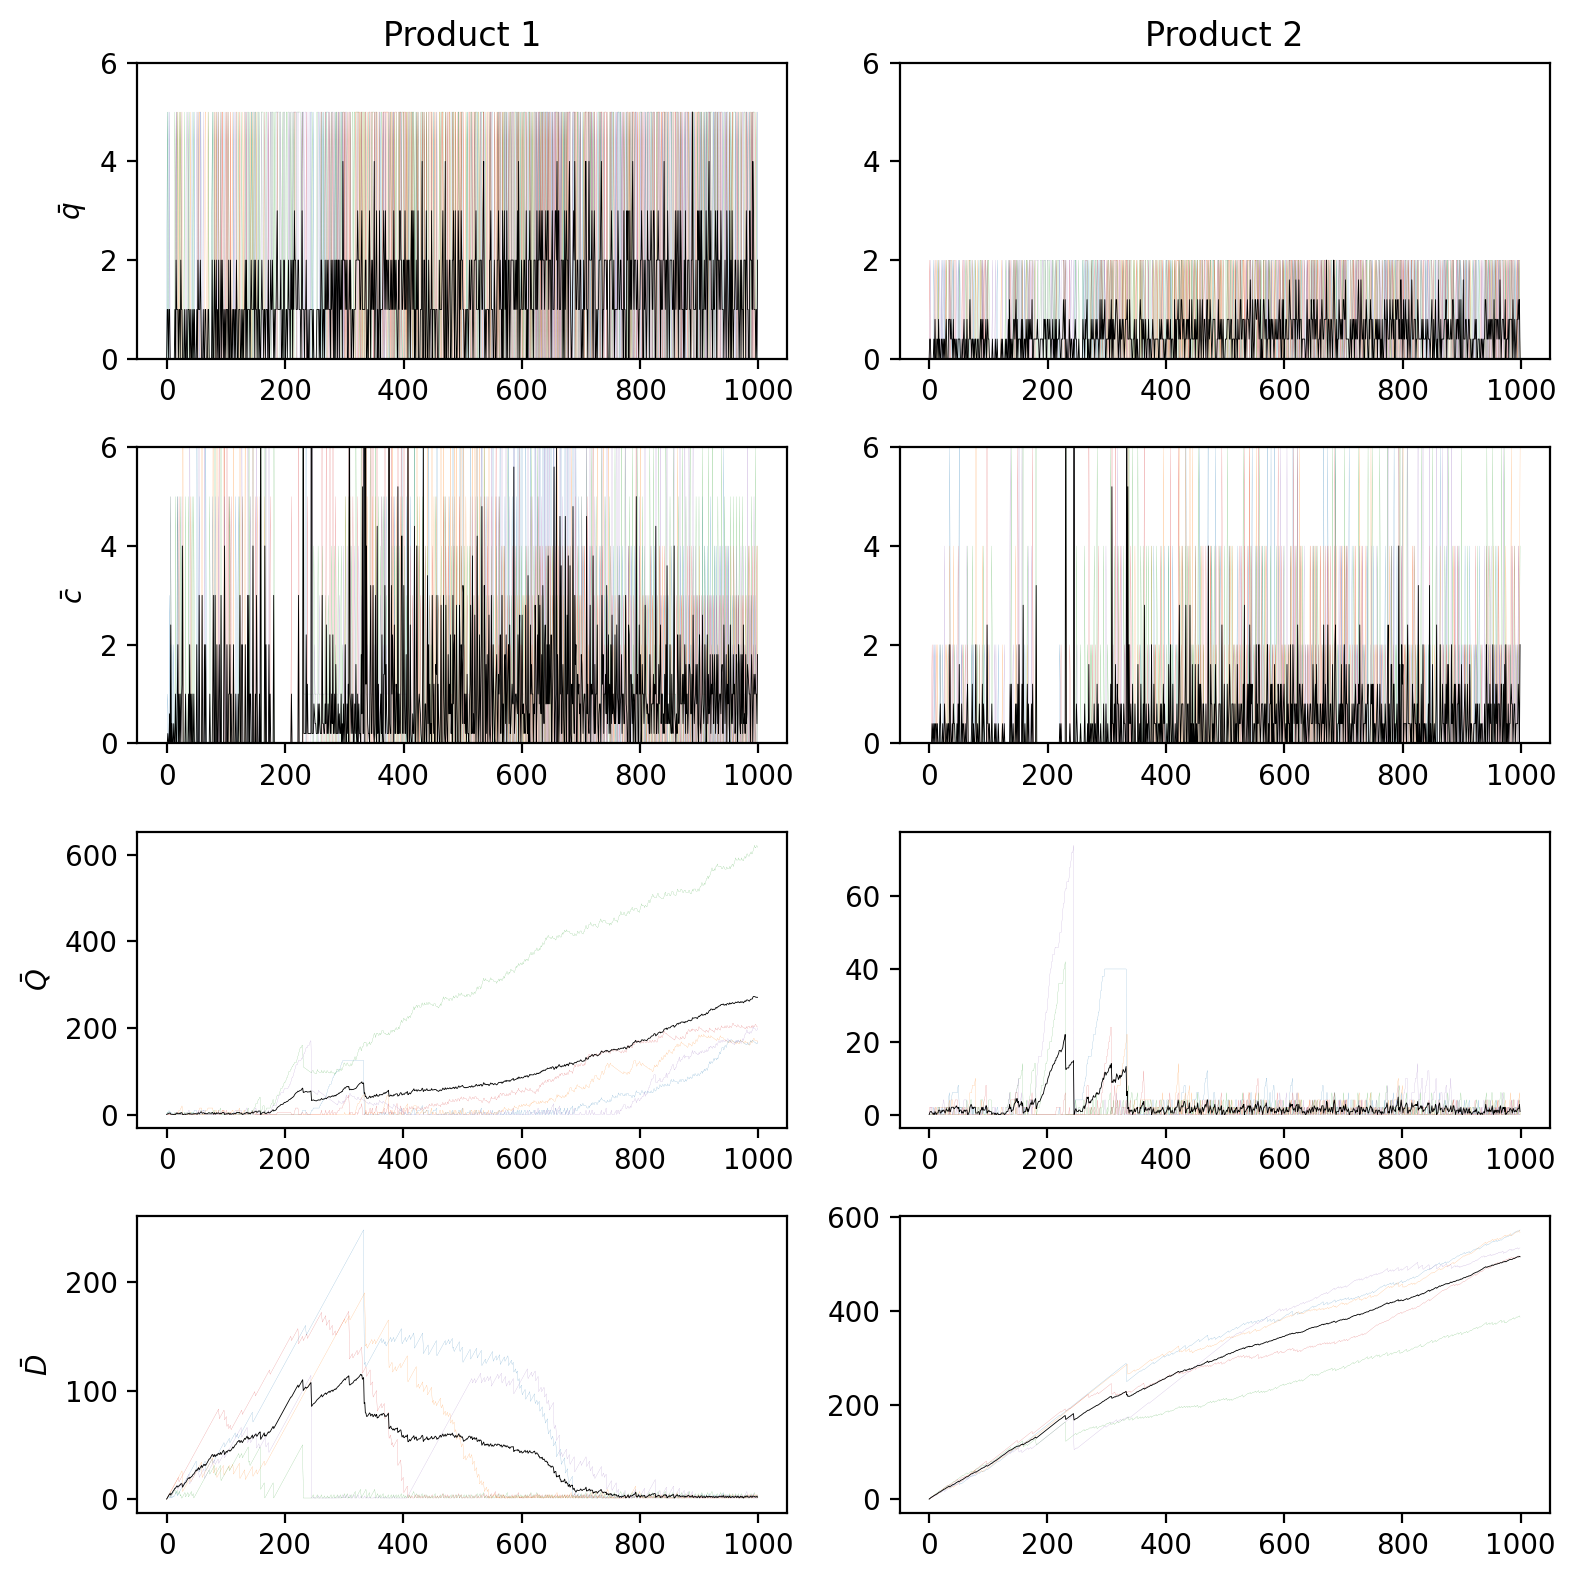

In [16]:
splt.plotQuantities(lw1=0.3, lw2=0.05, xmax=10, tight_layout=True, Qlog=False, Dlog=False, qmin=0, qmax=6, cmin=0, cmax=6)